# Fraud Detection Model

In [1]:
#import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load training dataset
df = pd.read_excel('trainset.xlsx')
df.shape
df = df[df.CUST_AGE >= 60]
df.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019 6:45:37,2001-11-01,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,UT,5/8/2020 10:27:6,1987-02-07,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud
9,14.23,1890.65,72,4,276,4/22/2020 9:56:55,NaN,NaN,NaN,ONLN,...,VA,5/12/2017 10:54:10,1976-12-23,3/3/2021 7:14:46,3/3/2021,SCHPMT,P2P_COMMIT,P2P,3/3/2021,Fraud
13,476.36,28.82,64,11,1200,NaN,t-mobile usa inc.,southwest,california,ONLN,...,AZ,5/6/2019 6:27:47,1993-10-09,4/20/2021 10:0:51,4/20/2021,SCHPMT,P2P_COMMIT,P2P,4/20/2021,Non-Fraud
15,27.11,0.00,76,4,45,8/17/2020 10:7:20,charter communications inc,southwest,california,MOBL,...,CA,6/8/2020 19:45:37,2001-02-07,1/31/2021 21:0:51,1/31/2021,SCHPMT,P2P_COMMIT,P2P,1/31/2021,Non-Fraud


# Exploratory Data Analysis

In [3]:
df.FRAUD_NONFRAUD = pd.Categorical(df.FRAUD_NONFRAUD)
df['fraud_code'] = df.FRAUD_NONFRAUD.cat.codes

In [4]:
df.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,fraud_code
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,2/16/2019 6:45:37,2001-11-01,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud,1
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,5/8/2020 10:27:6,1987-02-07,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud,0
9,14.23,1890.65,72,4,276,4/22/2020 9:56:55,NaN,NaN,NaN,ONLN,...,5/12/2017 10:54:10,1976-12-23,3/3/2021 7:14:46,3/3/2021,SCHPMT,P2P_COMMIT,P2P,3/3/2021,Fraud,0
13,476.36,28.82,64,11,1200,NaN,t-mobile usa inc.,southwest,california,ONLN,...,5/6/2019 6:27:47,1993-10-09,4/20/2021 10:0:51,4/20/2021,SCHPMT,P2P_COMMIT,P2P,4/20/2021,Non-Fraud,1
15,27.11,0.00,76,4,45,8/17/2020 10:7:20,charter communications inc,southwest,california,MOBL,...,6/8/2020 19:45:37,2001-02-07,1/31/2021 21:0:51,1/31/2021,SCHPMT,P2P_COMMIT,P2P,1/31/2021,Non-Fraud,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6920 entries, 3 to 13999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TRAN_AMT                 6920 non-null   float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL  6920 non-null   float64       
 2   CUST_AGE                 6920 non-null   int64         
 3   OPEN_ACCT_CT             6920 non-null   int64         
 4   WF_dvc_age               6920 non-null   int64         
 5   PWD_UPDT_TS              5465 non-null   object        
 6   CARR_NAME                5522 non-null   object        
 7   RGN_NAME                 5522 non-null   object        
 8   STATE_PRVNC_TXT          5522 non-null   object        
 9   ALERT_TRGR_CD            6920 non-null   object        
 10  DVC_TYPE_TXT             6046 non-null   object        
 11  AUTHC_PRIM_TYPE_CD       6920 non-null   object        
 12  AUTHC_SCNDRY_STAT_TXT    6886 non

In [6]:
df.CUST_AGE = df.CUST_AGE.astype('float64')
df.OPEN_ACCT_CT = df.OPEN_ACCT_CT.astype('float64')
df.WF_dvc_age = df.WF_dvc_age.astype('float64')

In [7]:
df.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,fraud_code
3,0.01,0.00,62.0,3.0,835.0,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,2/16/2019 6:45:37,2001-11-01,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud,1
4,497.08,12725.18,81.0,2.0,1095.0,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,5/8/2020 10:27:6,1987-02-07,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud,0
9,14.23,1890.65,72.0,4.0,276.0,4/22/2020 9:56:55,NaN,NaN,NaN,ONLN,...,5/12/2017 10:54:10,1976-12-23,3/3/2021 7:14:46,3/3/2021,SCHPMT,P2P_COMMIT,P2P,3/3/2021,Fraud,0
13,476.36,28.82,64.0,11.0,1200.0,NaN,t-mobile usa inc.,southwest,california,ONLN,...,5/6/2019 6:27:47,1993-10-09,4/20/2021 10:0:51,4/20/2021,SCHPMT,P2P_COMMIT,P2P,4/20/2021,Non-Fraud,1
15,27.11,0.00,76.0,4.0,45.0,8/17/2020 10:7:20,charter communications inc,southwest,california,MOBL,...,6/8/2020 19:45:37,2001-02-07,1/31/2021 21:0:51,1/31/2021,SCHPMT,P2P_COMMIT,P2P,1/31/2021,Non-Fraud,1


In [8]:
df.to_excel('filteredtrainset.xlsx')

In [9]:
duplicate = df[df.duplicated()]

In [10]:
print(duplicate)

Empty DataFrame
Columns: [TRAN_AMT, ACCT_PRE_TRAN_AVAIL_BAL, CUST_AGE, OPEN_ACCT_CT, WF_dvc_age, PWD_UPDT_TS, CARR_NAME, RGN_NAME, STATE_PRVNC_TXT, ALERT_TRGR_CD, DVC_TYPE_TXT, AUTHC_PRIM_TYPE_CD, AUTHC_SCNDRY_STAT_TXT, CUST_ZIP, CUST_STATE, PH_NUM_UPDT_TS, CUST_SINCE_DT, TRAN_TS, TRAN_DT, ACTN_CD, ACTN_INTNL_TXT, TRAN_TYPE_CD, ACTVY_DT, FRAUD_NONFRAUD, fraud_code]
Index: []

[0 rows x 25 columns]


In [12]:
df.ALERT_TRGR_CD = pd.Categorical(df.ALERT_TRGR_CD)
df['alert_code'] = df.ALERT_TRGR_CD.cat.codes
df.AUTHC_PRIM_TYPE_CD = pd.Categorical(df.AUTHC_PRIM_TYPE_CD)
df['auth_code'] = df.AUTHC_PRIM_TYPE_CD.cat.codes

In [13]:
df.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,fraud_code,alert_code,auth_code
3,0.01,0.00,62.0,3.0,835.0,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud,1,0,4
4,497.08,12725.18,81.0,2.0,1095.0,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud,0,0,4
9,14.23,1890.65,72.0,4.0,276.0,4/22/2020 9:56:55,NaN,NaN,NaN,ONLN,...,3/3/2021 7:14:46,3/3/2021,SCHPMT,P2P_COMMIT,P2P,3/3/2021,Fraud,0,1,4
13,476.36,28.82,64.0,11.0,1200.0,NaN,t-mobile usa inc.,southwest,california,ONLN,...,4/20/2021 10:0:51,4/20/2021,SCHPMT,P2P_COMMIT,P2P,4/20/2021,Non-Fraud,1,1,4
15,27.11,0.00,76.0,4.0,45.0,8/17/2020 10:7:20,charter communications inc,southwest,california,MOBL,...,1/31/2021 21:0:51,1/31/2021,SCHPMT,P2P_COMMIT,P2P,1/31/2021,Non-Fraud,1,0,4


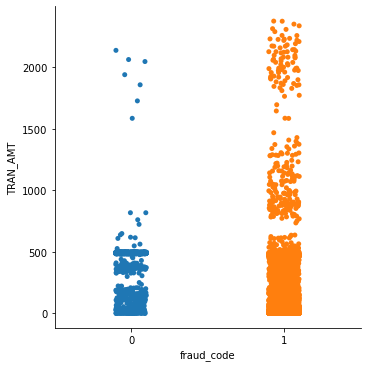

In [14]:
sns.catplot(x=df.fraud_code,y=df.TRAN_AMT,data=df)
plt.show()

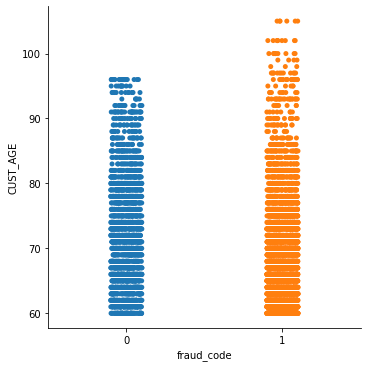

In [15]:
sns.catplot(x=df.fraud_code,y=df.CUST_AGE,data=df)
plt.show()

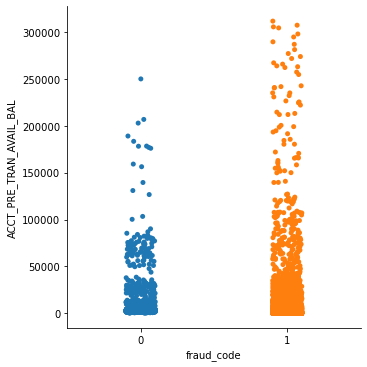

In [16]:
sns.catplot(x=df.fraud_code,y=df.ACCT_PRE_TRAN_AVAIL_BAL,data=df)

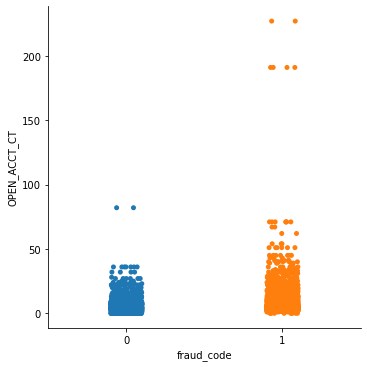

In [17]:
sns.catplot(x=df.fraud_code,y=df.OPEN_ACCT_CT,data=df)

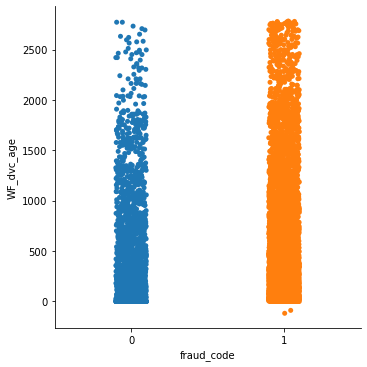

In [18]:
sns.catplot(x=df.fraud_code,y=df.WF_dvc_age,data=df)

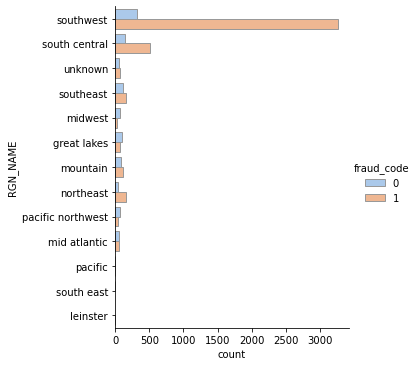

In [19]:
sns.catplot(y=df.RGN_NAME,hue="fraud_code",kind = "count",palette="pastel", edgecolor=".6",data=df)

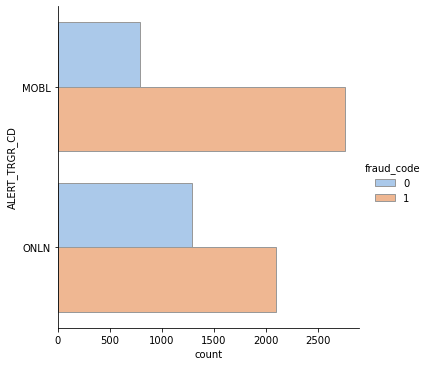

In [20]:
sns.catplot(y=df.ALERT_TRGR_CD,hue="fraud_code",kind = "count",palette="pastel", edgecolor=".6",data=df)

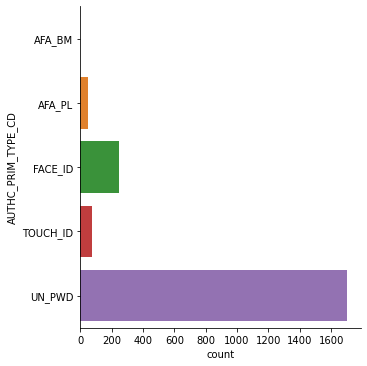

In [21]:
sns.catplot(y="AUTHC_PRIM_TYPE_CD",kind = "count",data=df[df.fraud_code == 0])
plt.show()

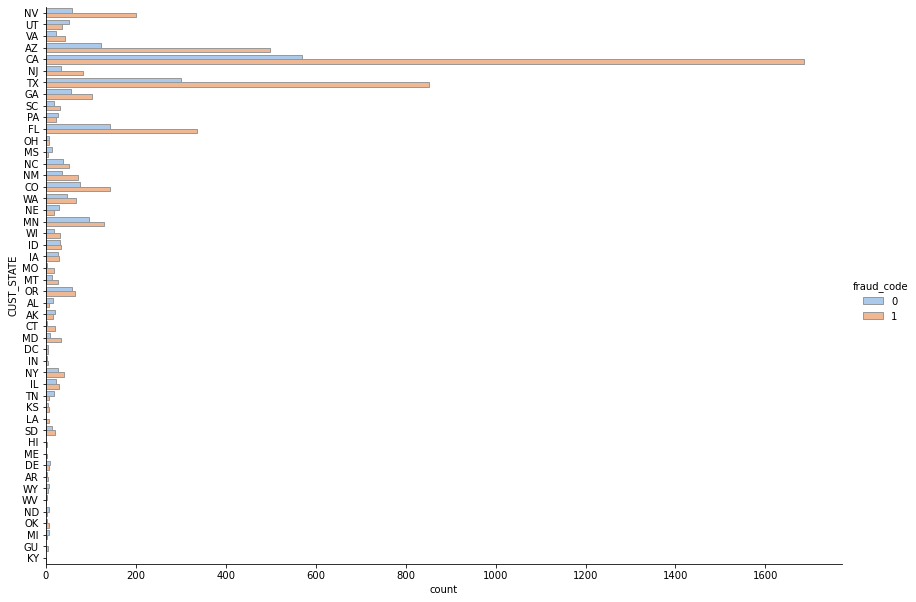

In [22]:
sns.catplot(y=df.CUST_STATE,hue="fraud_code",kind = "count",palette="pastel", edgecolor=".6",data=df,height=8.27,aspect=11.7/8.27)

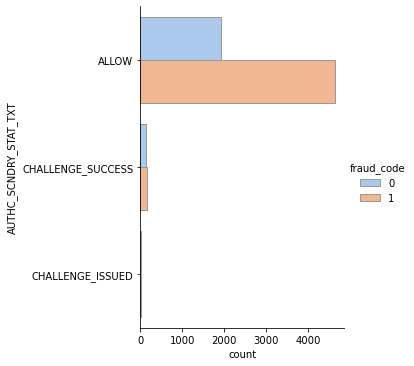

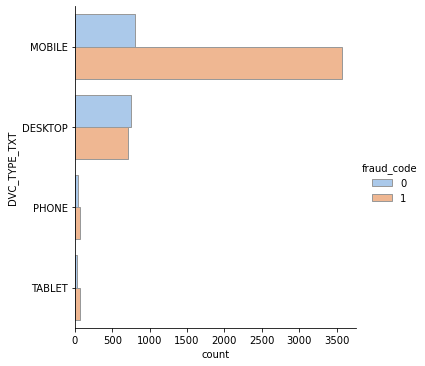

In [23]:
sns.catplot(y=df.AUTHC_SCNDRY_STAT_TXT,hue="fraud_code",kind = "count",palette="pastel", edgecolor=".6",data=df)
sns.catplot(y=df.DVC_TYPE_TXT,hue="fraud_code",kind = "count",palette="pastel", edgecolor=".6",data=df)

In [24]:
df.RGN_NAME = pd.Categorical(df.RGN_NAME)
df['rgn_code'] = df.RGN_NAME.cat.codes

In [25]:
df.AUTHC_SCNDRY_STAT_TXT = pd.Categorical(df.AUTHC_SCNDRY_STAT_TXT)
df['allow_code'] = df.AUTHC_SCNDRY_STAT_TXT.cat.codes
df.DVC_TYPE_TXT = pd.Categorical(df.DVC_TYPE_TXT)
df['device_code'] = df.DVC_TYPE_TXT.cat.codes

c = df.RGN_NAME.astype('category')
d = dict(enumerate(c.cat.categories))
print (d)

c = df.AUTHC_PRIM_TYPE_CD.astype('category')
d = dict(enumerate(c.cat.categories))
print (d)

{0: 'great lakes', 1: 'leinster', 2: 'mid atlantic', 3: 'midwest', 4: 'mountain', 5: 'northeast', 6: 'pacific', 7: 'pacific northwest', 8: 'south central', 9: 'south east', 10: 'southeast', 11: 'southwest', 12: 'unknown'}
{0: 'AFA_BM', 1: 'AFA_PL', 2: 'FACE_ID', 3: 'TOUCH_ID', 4: 'UN_PWD'}


In [26]:
df.head()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,fraud_code,alert_code,auth_code,rgn_code,allow_code,device_code
3,0.01,0.00,62.0,3.0,835.0,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,P2P_COMMIT,P2P,8/10/2021,Non-Fraud,1,0,4,11,0,1
4,497.08,12725.18,81.0,2.0,1095.0,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,P2P_COMMIT,P2P,6/27/2021,Fraud,0,0,4,8,2,1
9,14.23,1890.65,72.0,4.0,276.0,4/22/2020 9:56:55,NaN,NaN,NaN,ONLN,...,P2P_COMMIT,P2P,3/3/2021,Fraud,0,1,4,-1,0,-1
13,476.36,28.82,64.0,11.0,1200.0,NaN,t-mobile usa inc.,southwest,california,ONLN,...,P2P_COMMIT,P2P,4/20/2021,Non-Fraud,1,1,4,11,0,1
15,27.11,0.00,76.0,4.0,45.0,8/17/2020 10:7:20,charter communications inc,southwest,california,MOBL,...,P2P_COMMIT,P2P,1/31/2021,Non-Fraud,1,0,4,11,0,1


In [27]:
df.to_excel('oct3dataframe.xlsx',index = False)

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,FRAUD_NONFRAUD,fraud_code,alert_code,auth_code,rgn_code,allow_code,device_code,tran_hour,tran_month,cust_year
3,0.01,0.00,62.0,3.0,835.0,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,Non-Fraud,1,0,4,11,0,1,15,8,2001
4,497.08,12725.18,81.0,2.0,1095.0,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,Fraud,0,0,4,8,2,1,11,6,1987
9,14.23,1890.65,72.0,4.0,276.0,4/22/2020 9:56:55,NaN,NaN,NaN,ONLN,...,Fraud,0,1,4,-1,0,-1,7,3,1976
13,476.36,28.82,64.0,11.0,1200.0,NaN,t-mobile usa inc.,southwest,california,ONLN,...,Non-Fraud,1,1,4,11,0,1,10,4,1993
15,27.11,0.00,76.0,4.0,45.0,8/17/2020 10:7:20,charter communications inc,southwest,california,MOBL,...,Non-Fraud,1,0,4,11,0,1,21,1,2001


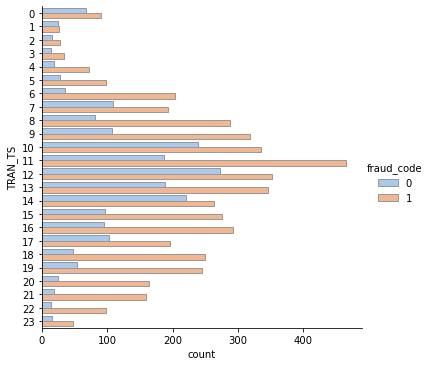

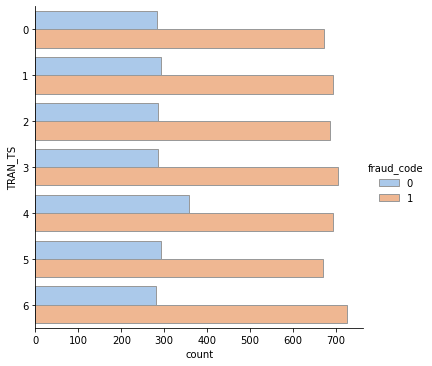

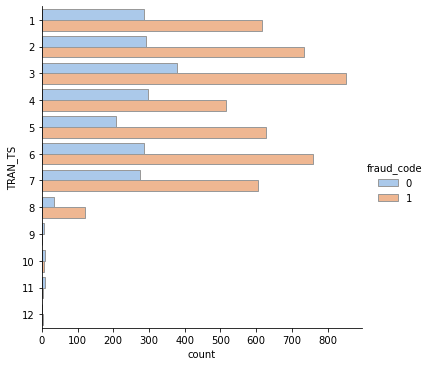

In [159]:
df['TRAN_TS'] = pd.to_datetime(df['TRAN_TS'])
sns.catplot(y=df.TRAN_TS.dt.hour,hue="fraud_code",kind = "count",palette="pastel", edgecolor=".6",data=df)
sns.catplot(y=df.TRAN_TS.dt.dayofweek,hue="fraud_code",kind = "count",palette="pastel", edgecolor=".6",data=df)
sns.catplot(y=df.TRAN_TS.dt.month,hue="fraud_code",kind = "count",palette="pastel", edgecolor=".6",data=df)
df['tran_hour'] = df.TRAN_TS.dt.hour
df['tran_month'] = df.TRAN_TS.dt.month
df.head()

# Models

In [141]:
from sklearn.model_selection import train_test_split
features = ['TRAN_AMT','ACCT_PRE_TRAN_AVAIL_BAL','WF_dvc_age','tran_hour','device_code']
x = np.array(df[features])
y = np.array(df['fraud_code'])
# Split set for training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

#### Random Forests

In [160]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

In [161]:
print(metrics.classification_report(y_test, y_pred))
print("roc_auc_score: ", metrics.roc_auc_score(y_test, y_pred))
print("f1 score: ", metrics.f1_score(y_test, y_pred))
print("accuracy: ", metrics.accuracy_score(y_test,y_pred))
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       411
           1       0.94      0.96      0.95       973

    accuracy                           0.93      1384
   macro avg       0.92      0.91      0.92      1384
weighted avg       0.93      0.93      0.93      1384

roc_auc_score:  0.9101019497228078
f1 score:  0.9505858380030566
accuracy:  0.9299132947976878


Predicted Result,0,1
Actual Result,,
0,354,57
1,40,933


In [146]:
feature_df = pd.DataFrame({'Importance':reg_rf.feature_importances_, 'Features': features })
print(feature_df)

   Importance                 Features
0    0.590742                 TRAN_AMT
1    0.194369  ACCT_PRE_TRAN_AVAIL_BAL
2    0.142700               WF_dvc_age
3    0.035820                tran_hour
4    0.036369              device_code


#### K-Nearest Neighbors

In [147]:
from sklearn.neighbors import KNeighborsClassifier
reg_knn = KNeighborsClassifier()
reg_knn.fit(X_train, y_train)
y_pred = reg_knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("roc_auc_score: ", metrics.roc_auc_score(y_test, y_pred))
print("f1 score: ", metrics.f1_score(y_test, y_pred))
pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       411
           1       0.91      0.91      0.91       973

    accuracy                           0.87      1384
   macro avg       0.85      0.85      0.85      1384
weighted avg       0.87      0.87      0.87      1384

roc_auc_score:  0.8480481516767816
f1 score:  0.9107692307692308


Predicted Result,0,1
Actual Result,,
0,322,89
1,85,888


# Running on Testset

In [152]:
dftest = pd.read_excel('testset.xlsx')
dftest['FRAUD_NONFRAUD'] = ""
dftest.ALERT_TRGR_CD = pd.Categorical(dftest.ALERT_TRGR_CD)
dftest['alert_code'] = dftest.ALERT_TRGR_CD.cat.codes
dftest.AUTHC_PRIM_TYPE_CD = pd.Categorical(dftest.AUTHC_PRIM_TYPE_CD)
dftest['auth_code'] = dftest.AUTHC_PRIM_TYPE_CD.cat.codes
dftest.DVC_TYPE_TXT = pd.Categorical(dftest.DVC_TYPE_TXT)
dftest['device_code'] = dftest.DVC_TYPE_TXT.cat.codes
dftest['TRAN_TS'] = pd.to_datetime(dftest['TRAN_TS'])
dftest['tran_hour'] = dftest.TRAN_TS.dt.hour
dftest['cust_year'] = dftest.CUST_SINCE_DT.dt.year
dftestfeatures = ['ACCT_PRE_TRAN_AVAIL_BAL','WF_dvc_age','device_code','tran_hour','TRAN_AMT']
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dataset_id               6000 non-null   int64         
 1   TRAN_AMT                 6000 non-null   float64       
 2   ACCT_PRE_TRAN_AVAIL_BAL  6000 non-null   float64       
 3   CUST_AGE                 6000 non-null   int64         
 4   OPEN_ACCT_CT             6000 non-null   int64         
 5   WF_dvc_age               6000 non-null   int64         
 6   PWD_UPDT_TS              4682 non-null   object        
 7   CARR_NAME                4825 non-null   object        
 8   RGN_NAME                 4825 non-null   object        
 9   STATE_PRVNC_TXT          4825 non-null   object        
 10  ALERT_TRGR_CD            6000 non-null   category      
 11  DVC_TYPE_TXT             5197 non-null   category      
 12  AUTHC_PRIM_TYPE_CD       6000 non-

In [153]:
y = reg_rf.predict(dftest[dftestfeatures])
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [154]:
dftest['FRAUD_NONFRAUD'] = y[:]

In [155]:
dftest['FRAUD_NONFRAUD'].value_counts()

1    4972
0    1028
Name: FRAUD_NONFRAUD, dtype: int64

In [156]:
dftest1 = dftest[dftest.CUST_AGE < 60]
dftest1.head()

,dataset_id,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,...,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,alert_code,auth_code,device_code,tran_hour,cust_year
0,1,54.25,0.00,23,4,634,9/18/2020 9:33:44,charter communications inc,southwest,california,...,SCHPMT,P2P_COMMIT,P2P,1/8/2021,1,0,4,0,11,2011
1,2,110.30,0.00,56,3,1876,5/16/2021 17:2:31,comcast,mountain,colorado,...,SCHPMT,P2P_COMMIT,P2P,2/27/2021,1,1,4,1,7,2001
2,3,515.95,0.00,33,5,40,NaN,point broadband fiber holding llc,mid atlantic,virginia,...,SCHPMT,P2P_COMMIT,P2P,4/22/2021,1,0,4,1,11,1999
5,6,471.72,36011.52,39,4,1267,NaN,charter communications inc,southwest,california,...,SCHPMT,P2P_COMMIT,P2P,6/25/2021,0,0,1,-1,17,2020
6,7,490.57,2801.23,33,7,-33,4/8/2018 16:24:2,NaN,NaN,NaN,...,SCHPMT,P2P_COMMIT,P2P,3/29/2021,1,0,4,1,7,2004


In [157]:
dftest1.FRAUD_NONFRAUD.value_counts()

1    2526
0     531
Name: FRAUD_NONFRAUD, dtype: int64